In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [36]:
data = pd.read_csv('/content/sample_data/combined_dataND1.0.csv')
data

,Unnamed: 0,index,index_character,index_world,name,poster,hero,url,group,Unnamed: 8,url_info,description
0,0.0,1,1,0,Создать,https://github.com/yupest/guess_who/blob/main/...,NaN,https://forms.gle/ezzDeRL6WM3gbXTr7,Все,NaN,NaN,NaN
1,1.0,2,1,0,Оценить,https://github.com/yupest/guess_who/blob/main/...,NaN,https://forms.gle/kx9hjRVi6KT9TyFg7,Все,NaN,NaN,NaN
2,2.0,1616,1,0,Помочь проекту,https://github.com/yupest/guess_who/blob/main/...,NaN,payment.html,Все,NaN,NaN,NaN
3,3.0,3,1,1,Наруто,https://c.wallhere.com/photos/d4/f4/Naruto_Shi...,Наруто,http://pm1.narvii.com/6922/d7d029f10750725a220...,Аниме,NaN,NaN,NaN
4,4.0,4,2,1,Наруто,https://c.wallhere.com/photos/d4/f4/Naruto_Shi...,Хината,https://wallup.net/wp-content/uploads/2019/09/...,Аниме,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1584,NaN,1684,67,91,Ванпанчмен,https://mirai.senkuro.net/anime/55450460120441...,Бронированная Горилла,https://mirai.senkuro.net/characters/467900597...,Аниме,NaN,NaN,NaN
1585,NaN,1685,68,92,Ванпанчмен,https://mirai.senkuro.net/anime/55450460120441...,Бронированный главный клерк,https://mirai.senkuro.net/characters/467900591...,Аниме,NaN,NaN,NaN
1586,NaN,1686,69,93,Ванпанчмен,https://mirai.senkuro.net/anime/55450460120441...,Возвращатель,https://mirai.senkuro.net/characters/467900580...,Аниме,NaN,NaN,NaN
1587,NaN,1687,70,94,Ванпанчмен,https://mirai.senkuro.net/anime/55450460120441...,Сайтама,https://mirai.senkuro.net/characters/467900568...,Аниме,NaN,NaN,NaN


Dropdown(description='Выберите:', options=('group', 'name'), value='group')

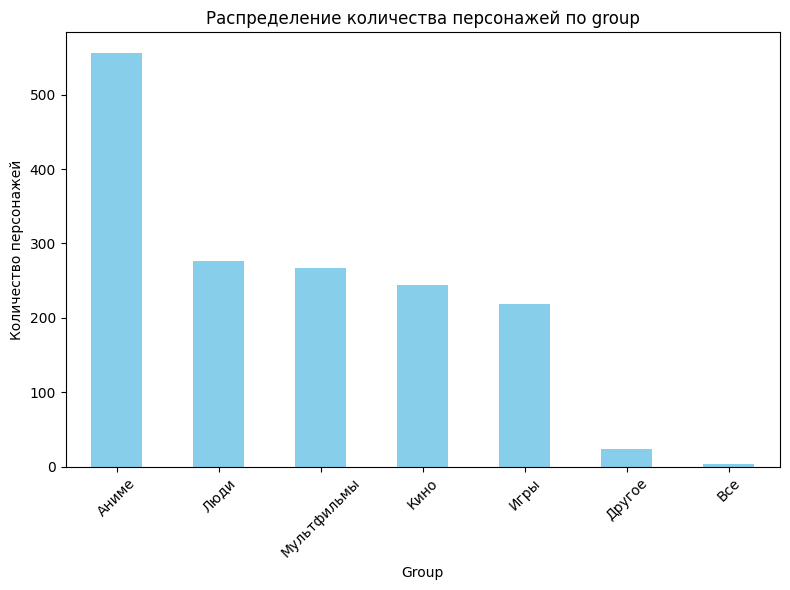

In [37]:
# Функция для построения графика в зависимости от выбора (group или name)
def plot_distribution(column):
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Распределение количества персонажей по {column}')
    plt.xlabel(f'{column.capitalize()}')
    plt.ylabel('Количество персонажей')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Создание выпадающего списка для выбора группы или мира
choose_column = widgets.Dropdown(
    options=['group', 'name'],
    value='group',
    description='Выберите:',
)

# Обновление графика при изменении выбора в выпадающем списке
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_distribution(change['new'])

choose_column.observe(on_change)

# Отображение выпадающего списка и графика
display(choose_column)
plot_distribution(choose_column.value)

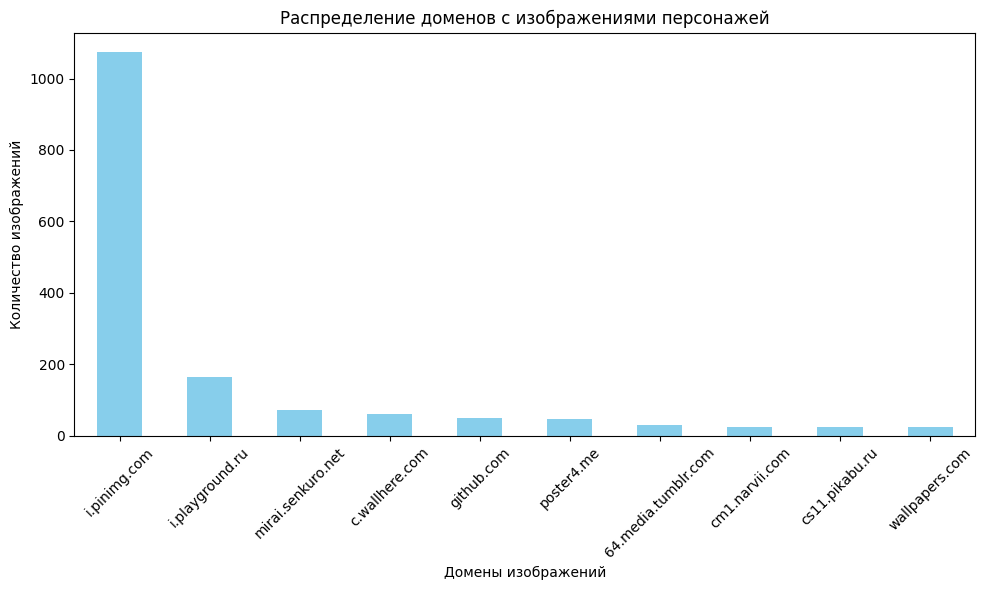

In [40]:
from urllib.parse import urlparse


data['domain'] = data['poster'].apply(lambda x: urlparse(x).netloc)
domain_counts = data['domain'].value_counts()


top_domains = domain_counts.head(10)

# Визуализация распределения доменов с изображениями
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_domains.plot(kind='bar', color='skyblue')
plt.title('Распределение доменов с изображениями персонажей')
plt.xlabel('Домены изображений')
plt.ylabel('Количество изображений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()